In [1]:
%run my_split_func2.ipynb
# Function = my_train_test_split(X, y)
%run plot_features_importance.ipynb
#Function = plot_features_importance(model)

In [2]:
# df will return grouped dataframe to act on

### Establish each body part dataframe for modeling

In [3]:
# This will drop Arms & Torso columns
legs = df.drop(['LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro',
                'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 'RA_xacc', 
                'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 
                'RA_ymag', 'RA_zmag', 'T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro',
                'T_zgyro', 'T_xmag', 'T_ymag', 'T_zmag'], axis=1)

In [4]:
# This will drop Legs & Torso
arms = df.drop(['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro', 'T_zgyro', 
                'T_xmag', 'T_ymag', 'T_zmag', 'RL_xacc', 'RL_yacc', 'RL_zacc', 
                'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
                'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 
                'LL_xmag', 'LL_ymag', 'LL_zmag'], axis=1)

In [5]:
# This will drop arms & Legs
torso = df.drop(['RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 
                 'RA_xmag', 'RA_ymag', 'RA_zmag', 'LA_xacc', 'LA_yacc', 'LA_zacc', 
                 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
                 'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 
                 'RL_xmag', 'RL_ymag', 'RL_zmag', 'LL_xacc', 'LL_yacc', 'LL_zacc', 
                 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag'], axis=1)

# Train Model on Torso

In [6]:
rf_torso = RandomForestClassifier()

In [7]:
y = torso['activity_number']

In [8]:
X = torso.drop('activity_number', axis=1)

In [9]:
X_train, X_test, y_train, y_test, random_values = my_train_test_split(X, y)

In [10]:
rf_torso.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
rf_torso.score(X_test, y_test)

0.5947368421052631

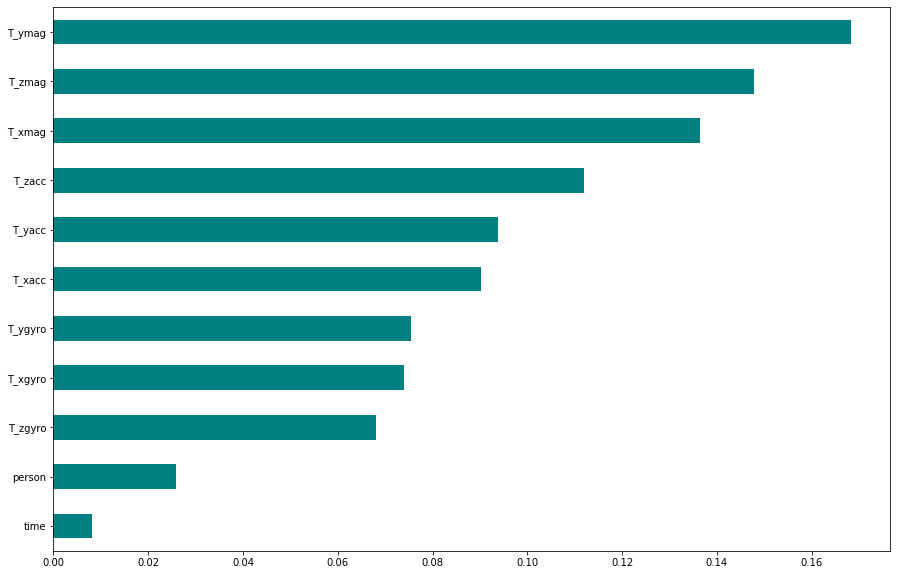

In [12]:
plot_features_importance(rf_torso, 'teal')

# Train model on Arms

In [13]:
rf_arms = RandomForestClassifier()

In [14]:
y = arms['activity_number']

In [15]:
X = arms.drop('activity_number', axis=1)

In [16]:
X_train, X_test, y_train, y_test, random_values = my_train_test_split(X, y)

In [17]:
rf_arms.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
rf_arms.score(X_test, y_test)

0.7105263157894737

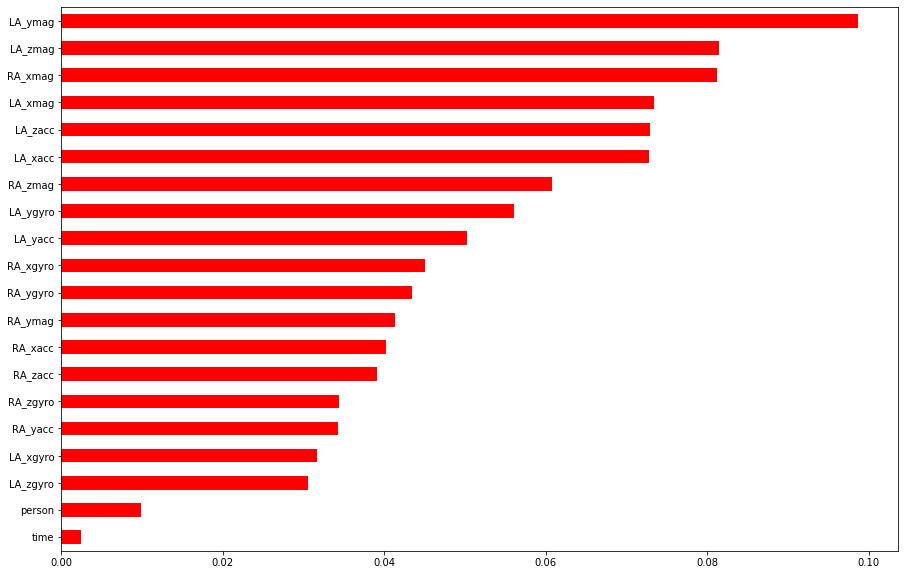

In [19]:
plot_features_importance(rf_arms, 'red')

# Train model on Legs

In [20]:
rf_legs = RandomForestClassifier()

In [21]:
y = legs['activity_number']

In [22]:
X = legs.drop('activity_number', axis=1)

In [23]:
X_train, X_test, y_train, y_test, random_values = my_train_test_split(X, y)

In [24]:
rf_legs.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
rf_legs.score(X_test, y_test)

0.7052631578947368

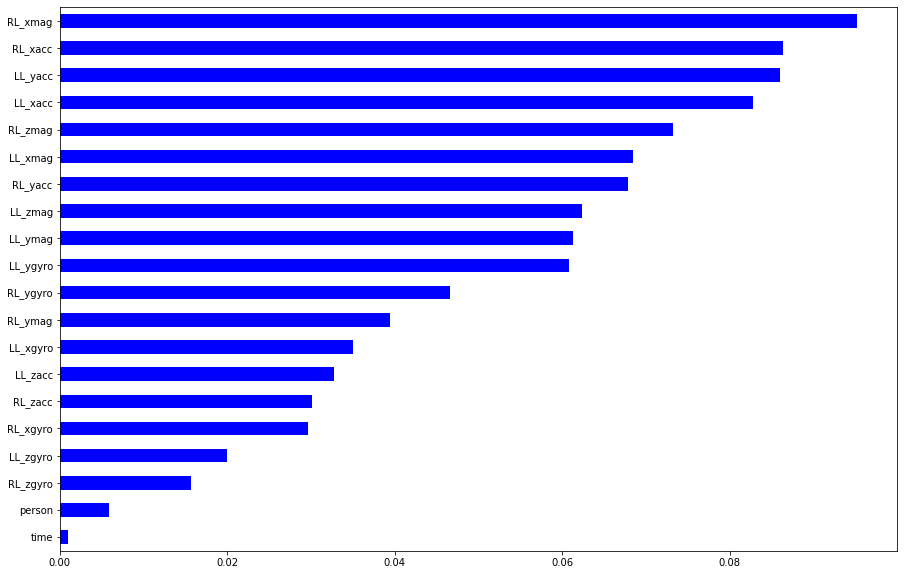

In [26]:
plot_features_importance(rf_legs, 'blue')

# Torso conclusion:
- Ranking of sensor importance for Torso:
    - 1st mag(netometers)
    - 2nd acc(elerometers)
    - 3rd gyro(scopes)
    
### Leverage the Torso's x,y,z mag(netometers)

# Arms conclusion:
- Ranking of sensor importance for Arms:
    - 1st mag(netometers)
    - 2nd acc(elerometers)
    - 3rd gyro(scopes)
    
### Leverage the Arms's x,y,z mag(netometers), mabe acc(elerometers) as a close 2nd...

# Legs conclusion:
- Ranking of sensor importance for Legs:
    - 1st - TIE - mag(netometers) & acc(elerometers)
    - 2nd - gyro(scopes)

# Train model on limited combination
Going to pull the following features from the dataframe:
- Torso mag features (x,y,z)
- Arms mag features (x,y,z)
- Legs mag & acc (x,y,z)

In [27]:
rf_combo = RandomForestClassifier()

In [28]:
drop_these = [
    # Torso features to drop
    'T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro', 'T_zgyro',
    # Arm features to drop
    'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro',
    'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro',
    #Leg features to drop
    'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xmag', 'RL_ymag', 'RL_zmag',
    'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xmag', 'LL_ymag', 'LL_zmag',
    # Dropping person & time since it almost has 0 feature importance
    'time', 'person'
]

In [29]:
combo_df = df.drop(drop_these, axis=1)

In [30]:
y = combo_df['activity_number']

In [31]:
X = combo_df.drop('activity_number', axis=1)

In [32]:
X_train, X_test, y_train, y_test, random_values = my_train_test_split(X, y)

In [33]:
rf_combo.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
rf_combo.score(X_test, y_test)

0.7736842105263158

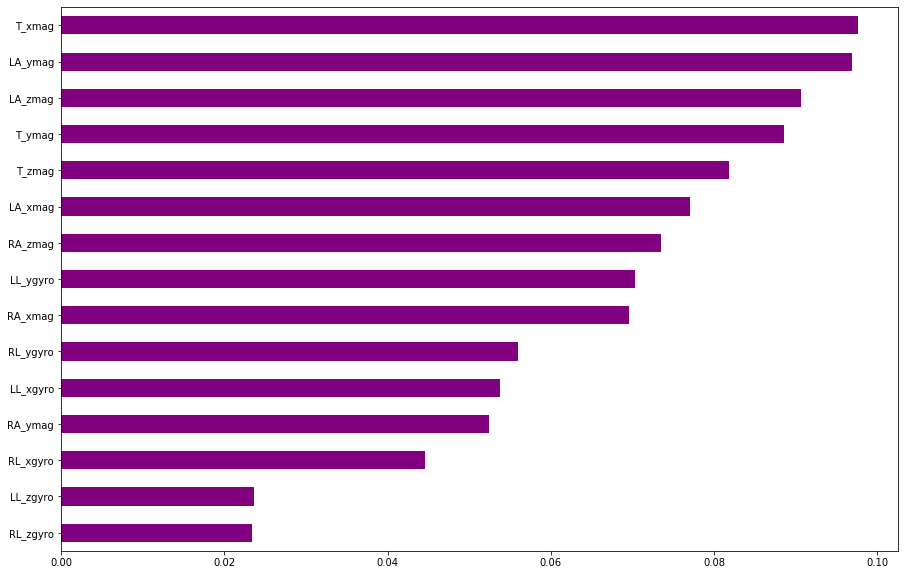

In [35]:
plot_features_importance(rf_combo, 'purple')